# PreLoads

In [2]:
%run /KEB.TDS/Functions/PreLoads

# Create Fake Records

In [ ]:
import random
import string

def create_fake_contact_details():
  """Creates a dataframe with 10 records about fake contact details."""
  columns = ["Name", "Email", "Phone Number"]
  data = []
  for i in range(10):
    name = ''.join(random.choice(string.ascii_lowercase) for _ in range(10))
    email = name + '@example.com'
    phone_number = '123-456-7890'
    data.append([name, email, phone_number])
  df = pd.DataFrame(data, columns=columns)
  return df

if __name__ == "__main__":
  df = create_fake_contact_details()
  print(df.to_string())

# Send Records to Amazon Kinesis Data Stream
Add **AmazonKinesisFullAccess** to **main** AWS Role in IAM

In [ ]:
import boto3
import json
import pandas as pd

def send_records_to_kinesis(data_frame, stream_name, region):
    # Create a Kinesis client
    kinesis_client = boto3.client('kinesis', region_name=region)
    
    # Convert DataFrame to a list of records
    records = data_frame.to_dict(orient='records')
    
    # Iterate over each record and send it to Kinesis
    for record in records:
        # Convert the record to JSON string
        record_data = json.dumps(record)
        
        # Send the record to Kinesis
        response = kinesis_client.put_record(
            StreamName=stream_name,
            Data=record_data,
            PartitionKey=str(record['Name'])
        )
        
        # Print the response from Kinesis (optional)
        print(response)

stream_name = 'Eloqua'
region = 'us-east-1'

send_records_to_kinesis(df, stream_name, region)

You can validate that these records were processed by going into the Amazon Kinesis module in AWS and selecting the **Data streams** in the left panel.
Select the **Data stream** that you are monitoring.

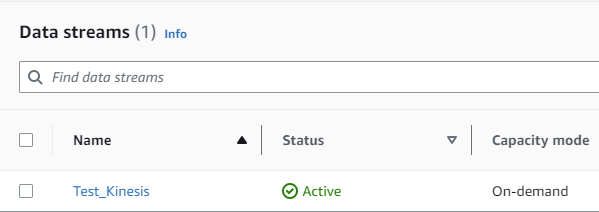

Then under the **Monitoring** tabs look for the **Incoming data - sum (Count)** graph. Please note that it can take a few minutes for records to show.

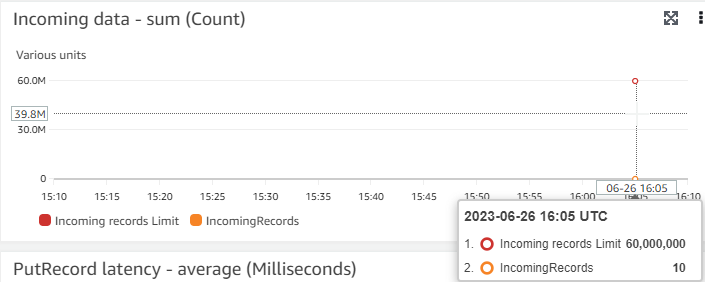